
**DPhi DataScience Bootcamp (Final Project)**  
**Name:** Johny Ijaq  

# Predicting the chances of Survival of a Patient after 1 year of treatment

The dataset contains the patient records collected from a hospital in Greenland. Hospital has been trying to improve its care conditions by looking at historic survival of the patients. They would like to identify the main factors leading to high survivals.  


**Data Description:**

`ID_Patient_Care_Situation:` Care situation of a patient during treatment

`Diagnosed_Condition:` The diagnosed condition of the patient

`ID_Patient:` Patient identifier number

`Treatment_with_drugs:` Class of drugs used during treatment

`Survived_1_year:` Whether the patient survived after one year of treatment (0 means did not survive; 1 means survived)

`Patient_Age:` Age of the patient

`Patient_Body_Mass_Index:` A calculated value based on the patient’s weight, height, etc.

`Patient_Smoker:` If the patient was a smoker or not

`Patient_Rural_Urban:` If the patient stayed in Rural or Urban part of the country

`Previous_Condition:` Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case).  

The "Survived_1_year" column is a `target variable` which has binary entries (0 or 1).


**Objective:**

To develop a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).  



## Contents
1. Importing libraries
2. Loading the data
3. Data preprocessing    
    3.1. Dealing with missing values  
    3.2. Dealing with categorical data  
4. Exploratory data analysis
5. Building the model     
6. Model evaluation  
   6.1. Feature selection  
   6.2. Hyperparameter tuning 
7. Testing the model

## 1. Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import sys
sys.setrecursionlimit(1500) # I've changed from 500 to 1000

## 2. Loading the data

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv")

In [6]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [8]:
data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [9]:
data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

## 3. Data preprocessing

### 3.1. Dealing with missing values 

In [12]:
#Column:Treated_with_drugs
mode = data["Treated_with_drugs"].mode()
mode

0    DX6
dtype: object

In [13]:
data["Treated_with_drugs"].value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [10]:
#data["Treated_with_drugs"].replace(np.nan, data["Treated_with_drugs"].mode, inplace = True)

data['Treated_with_drugs'] = data['Treated_with_drugs'].fillna(data['Treated_with_drugs'].mode()[0])

In [11]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [12]:
data.isnull().Treated_with_drugs.value_counts()

False    23097
Name: Treated_with_drugs, dtype: int64

In [13]:
#columns A to Z
mode = data["A"].astype('float').mode()
mode

0    1.0
dtype: float64

In [14]:
#data["A"].replace(np.nan, data["A"].mode, inplace = True)   #Mistake: np.nan should not be used
#data["A"] = data["A"].fillna(data["A"].mode())              #Mistake: .vales[0] should be added. Mode can return several values 
data['A'] = data['A'].fillna(data['A'].mode().values[0])     #with same max frequency. So to select the first one we use values[0]

In [15]:
data.isnull().A.value_counts()

False    23097
Name: A, dtype: int64

In [16]:
mode = data["B"].astype("float").mode()
#mode
data['B'] = data['B'].fillna(data['B'].mode().values[0])
data.isnull().B.value_counts()

False    23097
Name: B, dtype: int64

In [17]:
mode = data["C"].astype("float").mode
data["C"] = data["C"].fillna(data["C"].mode().values[0])
data.isnull().C.value_counts()

False    23097
Name: C, dtype: int64

In [18]:
mode = data["D"].astype("float").mode()
data["D"] = data["D"].fillna(data["C"].mode().values[0])
data.isnull().D.value_counts()

False    23097
Name: D, dtype: int64

In [19]:
mode = data["E"].astype("float").mode()
data["E"] = data["E"].fillna(data["E"].mode().values[0])
data.isnull().E.value_counts()

False    23097
Name: E, dtype: int64

In [20]:
mode = data["F"].astype("float").mode()
data["F"] = data["F"].fillna(data["F"].mode().values[0])
data.isnull().F.value_counts()

False    23097
Name: F, dtype: int64

In [21]:
mode = data["Z"].astype("float"). mode()
data["Z"] = data["Z"].fillna(data["Z"].mode().values[0])
data.isnull().Z.value_counts()

False    23097
Name: Z, dtype: int64

In [22]:
data["Number_of_prev_cond"].value_counts()

1.0    9386
2.0    9016
3.0    3026
4.0     397
5.0      37
Name: Number_of_prev_cond, dtype: int64

In [23]:
data["Number_of_prev_cond"].isnull().sum()

1235

In [24]:
#Adding the values from the columns A to Z
data.loc[data.Number_of_prev_cond.isnull() == True, "Number_of_prev_cond"] = data['A'] + data['B'] + data['C'] + data['D'] + data['E'] + data['F'] + data['Z']

In [25]:
data.isnull().Number_of_prev_cond.value_counts()

False    23097
Name: Number_of_prev_cond, dtype: int64

In [26]:
data.iloc[:, 9:17].head()

,A,B,C,D,E,F,Z,Number_of_prev_cond
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [27]:
data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [28]:
data.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

### 3.2. Dealing with Categorical Data

In [29]:
data["Patient_Smoker"].value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [30]:
mode = data["Patient_Smoker"].mode()
mode

0    NO
dtype: object

In [31]:
#Replacing 'Cannot say' with 'NO'
data['Patient_Smoker'].replace(['Cannot say'],'NO', inplace = True)
data["Patient_Smoker"].value_counts()

NO     13259
YES     9838
Name: Patient_Smoker, dtype: int64

In [32]:
#Assigning numerical values
le = LabelEncoder()
data['Patient_Smoker'] = le.fit_transform(data['Patient_Smoker'])
data['Patient_Smoker'].head(5)

0    1
1    1
2    1
3    0
4    0
Name: Patient_Smoker, dtype: int32

In [33]:
data["Patient_Rural_Urban"].value_counts()

RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [34]:
data["Patient_Rural_Urban"] = le.fit_transform(data["Patient_Rural_Urban"])
data["Patient_Rural_Urban"].head(5)

0    1
1    0
2    0
3    1
4    0
Name: Patient_Rural_Urban, dtype: int32

In [35]:
data["Patient_mental_condition"].value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

In [36]:
data = data.drop("Patient_mental_condition", axis = 1)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  int32  
 7   Patient_Rural_Urban        23097 non-null  int32  
 8   A                          23097 non-null  float64
 9   B                          23097 non-null  float64
 10  C                          23097 non-null  float64
 11  D                          23097 non-null  float64
 12  E                          23097 non-null  float64
 13  F                          23097 non-null  flo

In [38]:
#Label Encoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Treated_with_drugs'] = le.fit_transform(data['Treated_with_drugs']. astype(str))

In [39]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,31,56,18.479385,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,16,36,22.945566,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,31,48,27.510027,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,0,5,19.130976,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,31,128,1.348400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  int32  
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  int32  
 7   Patient_Rural_Urban        23097 non-null  int32  
 8   A                          23097 non-null  float64
 9   B                          23097 non-null  float64
 10  C                          23097 non-null  float64
 11  D                          23097 non-null  float64
 12  E                          23097 non-null  float64
 13  F                          23097 non-null  flo

In [41]:
#Get dummies
#data = pd.get_dummies(data, columns=["Treated_with_drugs"])

In [42]:
# ATTENTION -> Doesn't work
#from sklearn.preprocessing import OneHotEncoder 
#enc = OneHotEncoder(handle_unknown='ignore')
#data['Treated_with_drugs'] = OneHotEncoder().fit_transform(data['Treated_with_drugs']. astype(str))
#data['Treated_with_drugs'] = enc.fit_transform(data['Treated_with_drugs']. astype(str))

In [43]:
#enc = OneHotEncoder(handle_unknown='ignore')
#enc_df = pd.DataFrame(enc.fit_transform(data[['Treated_with_drugs']]).toarray())

#merge with main data on key values

#data = data.join(enc_df)

In [44]:
data = data.drop("Patient_ID", axis = 1)

In [45]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,31,56,18.479385,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,16,36,22.945566,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,31,48,27.510027,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,0,5,19.130976,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,31,128,1.348400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


## 4. Exploratory Data Analysis

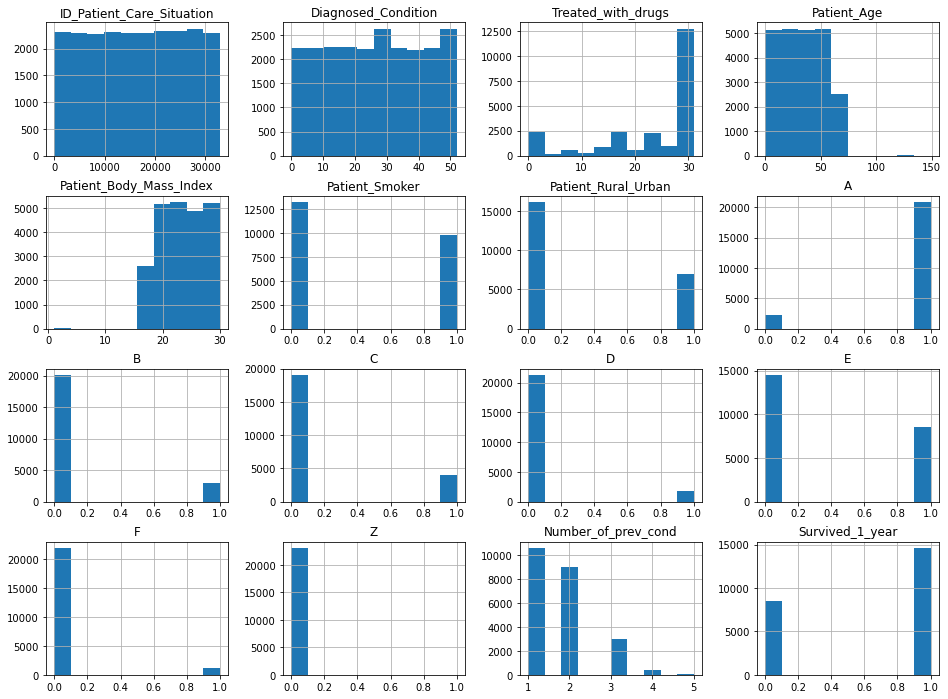

In [46]:
data.hist(bins=10, figsize=(16,12))
plt.show()

In [47]:
data.corr()

,ID_Patient_Care_Situation,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
ID_Patient_Care_Situation,1.000000,-0.007446,0.004453,0.000304,-0.007259,-0.000205,-0.000333,0.005100,0.004158,0.009425,-0.006928,-0.001042,0.007084,0.040983,0.008640,-0.004685
Diagnosed_Condition,-0.007446,1.000000,0.009113,-0.008971,0.008305,-0.001686,0.010335,0.005431,0.003063,-0.003634,-0.008186,0.006056,0.005311,-0.041702,0.002793,-0.004450
Treated_with_drugs,0.004453,0.009113,1.000000,-0.007248,-0.001935,-0.010117,0.004969,-0.013095,-0.009110,-0.003440,-0.004996,-0.000743,0.009114,0.018332,-0.009766,-0.182833
Patient_Age,0.000304,-0.008971,-0.007248,1.000000,-0.006560,0.280922,-0.005514,-0.028025,-0.011582,-0.010707,0.004541,-0.001239,0.007428,0.114038,-0.014670,-0.074934
Patient_Body_Mass_Index,-0.007259,0.008305,-0.001935,-0.006560,1.000000,0.019184,0.014156,0.020349,0.000848,-0.018060,-0.009257,-0.006431,-0.016045,-0.136708,-0.016848,-0.121844
Patient_Smoker,-0.000205,-0.001686,-0.010117,0.280922,0.019184,1.000000,-0.007220,-0.005125,0.006598,-0.008837,0.010825,0.002023,-0.003610,-0.020442,-0.000050,-0.253676
Patient_Rural_Urban,-0.000333,0.010335,0.004969,-0.005514,0.014156,-0.007220,1.000000,0.002834,-0.003848,0.007015,0.002068,-0.013022,0.005187,-0.015590,-0.003584,-0.112767
A,0.005100,0.005431,-0.013095,-0.028025,0.020349,-0.005125,0.002834,1.000000,-0.070336,-0.097536,-0.081067,-0.174069,-0.058407,-0.072557,0.148692,-0.043404
B,0.004158,0.003063,-0.009110,-0.011582,0.000848,0.006598,-0.003848,-0.070336,1.000000,-0.010937,0.004339,-0.000686,-0.010889,-0.009135,0.401671,-0.054560
C,0.009425,-0.003634,-0.003440,-0.010707,-0.018060,-0.008837,0.007015,-0.097536,-0.010937,1.000000,0.015097,-0.005649,0.006920,-0.010936,0.455918,-0.039701


<AxesSubplot:>

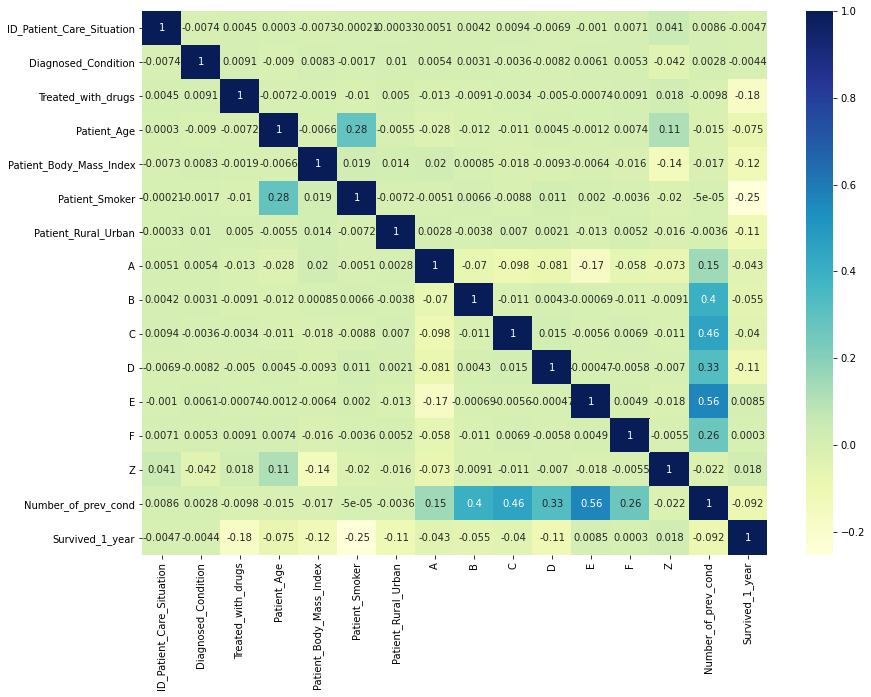

In [48]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True) 

## 5. Building the model

In [49]:
#Set X and y variables (defining input and target features)
X= data.drop("Survived_1_year", axis = 1)
y = data["Survived_1_year"]

In [50]:
# Shapes of X and y
print("Shape: ", X.shape, "Dimension: ", X.ndim)
print("Shape: ", y.shape, "Dimension: ", y.ndim)

Shape:  (23097, 15) Dimension:  2
Shape:  (23097,) Dimension:  1


In [51]:
X[0:5]

,ID_Patient_Care_Situation,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond
0,22374,8,31,56,18.479385,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,18164,5,16,36,22.945566,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6283,23,31,48,27.510027,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5339,51,0,5,19.130976,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33012,0,31,128,1.348400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [52]:
y[0:5]

0    0
1    1
2    0
3    1
4    1
Name: Survived_1_year, dtype: int64

<AxesSubplot:>

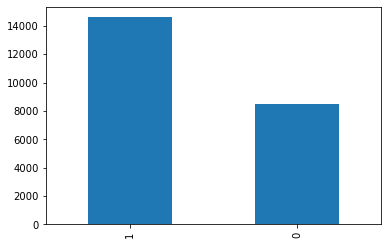

In [53]:
data['Survived_1_year'].value_counts().plot.bar()

In [54]:
# standardize the data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#X[0:5]

In [137]:
#Splitting data into Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 47)

In [138]:
#Logistic regression

#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()                         #Create object
#lr.fit(X_train,y_train)                           #Train the model

In [165]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

#Create an object
rfc = RandomForestClassifier()

#Train the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [140]:
#prediction for training dataset
y_train_pred = rfc.predict(X_train)

#prediction for test dataset
y_test_pred = rfc.predict(X_test)

## 6. Model evaluation

In [88]:
from sklearn.metrics import accuracy_score

print('Accuracy score for Training Dataset = ', accuracy_score(y_train, y_train_pred))
print('Accuracy score for Test Dataset = ', accuracy_score(y_test, y_test_pred))

Accuracy score for Training Dataset =  1.0
Accuracy score for Test Dataset =  0.8136363636363636


In [89]:
from sklearn.metrics import f1_score

f1_score = f1_score(y_test, y_test_pred, average='weighted')
print("F1-score: ", f1_score)

F1-score:  0.81275535543864


In [90]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
print('Avarage train score...' , cv_score.mean())
print('Std train score...' , cv_score.std())

Avarage train score... 0.812632952230949
Std train score... 0.00680021703844418


In [91]:
cv_score

array([0.81709957, 0.8008658 , 0.80681818, 0.81060606, 0.81439394,
       0.80952381, 0.81006494, 0.82024905, 0.81050352, 0.82620466])

### 6.1. Feature Selection

In [167]:
#Feature selection applying Recursive Feature Elimination

from sklearn.feature_selection import RFE 

rfe = RFE(estimator= rfc , step = 1) 

# Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 7
Selected Features: [ True  True  True  True  True  True False False False False False False
 False False  True]
Feature Ranking: [1 1 1 1 1 1 2 4 7 6 3 5 8 9 1]


In [168]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,ID_Patient_Care_Situation,1
1,Diagnosed_Condition,1
2,Treated_with_drugs,1
3,Patient_Age,1
4,Patient_Body_Mass_Index,1
5,Patient_Smoker,1
14,Number_of_prev_cond,1
6,Patient_Rural_Urban,2
10,D,3
7,A,4


#### Create a new subset of the data with only the selected features

In [169]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fitting the baseline model with the transformed data
rfc_rfe = rfc.fit(X_train_rfe, y_train)

#### Comparison of model performance with and without feature selection

In [170]:
# making predictions and evaluating the model
y_pred_rfe = rfc_rfe.predict(X_test_rfe)

rfe_acc = accuracy_score(y_test, y_pred_rfe)
#rfe_f1 = f1_score(y_test, y_pred_rfe)

print("RFE Model Accuracy: ", rfe_acc)
#print("RFE Model F1 Score: ", rfe_f1)

RFE Model Accuracy:  0.7831168831168831


#### Applying SMOTE to RFC

<AxesSubplot:>

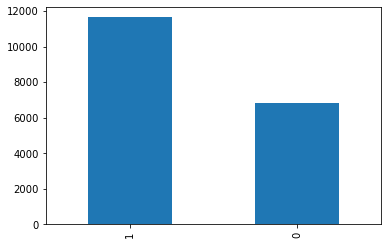

In [171]:
pd.Series(y_train).value_counts().plot.bar() 

#To check the balance between the two classes, 1 and 0
#There is no considerable imbalance between two classes


### 6.2. Hyper parameter tunning

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [99]:
criterion = ['gini', 'entropy']        
n_estimators = [100, 200, 300]      
max_features = ['auto', 'sqrt']       
max_depth = [10, 20]      
max_depth.append(None)     

params = {'criterion': criterion,
          'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth}


In [100]:
params

{'criterion': ['gini', 'entropy'],
 'n_estimators': [100, 200, 300],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, None]}

In [103]:
gs = GridSearchCV(rfc, param_grid=params, n_jobs=2)

In [104]:
gs.fit(X_train, y_train) 

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [105]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 300}

In [106]:
gs.best_score_

0.8167455289410634

In [107]:
gs.score(X_test, y_test)

0.8162337662337662

## 7. Testing the model

Testing the model on the unseen data

In [123]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [124]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [125]:
test_new.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond
count,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.0,9303.000000
mean,16392.542943,26.680426,6226.311620,33.249059,23.429321,0.893260,0.142320,0.183167,0.087284,0.399441,0.052886,0.0,1.758358
std,9531.750578,15.097842,3634.312461,19.477920,3.769305,0.308799,0.349396,0.386824,0.282265,0.489810,0.223818,0.0,0.771230
min,1.000000,1.000000,3.000000,0.000000,17.000695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,8133.000000,14.000000,3073.500000,17.000000,20.166849,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,16281.000000,27.000000,6246.000000,33.000000,23.392495,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000
75%,24588.500000,40.000000,9424.000000,50.000000,26.726929,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,2.000000
max,32975.000000,52.000000,12500.000000,66.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,5.000000


In [126]:
#No missing values
#Preprocessing tasks to be done:
#1. Drop Patient_ID and Pateint_mental_condition 
#2. Apply label encoding to the columns: Treated_with_drugs, Patient_Smoker and Patient_Rural_Urban

In [127]:
test_new = test_new.drop("Patient_ID", axis = 1)

In [128]:
test_new = test_new.drop("Patient_mental_condition", axis = 1)

In [129]:
test_new.head(5)

,ID_Patient_Care_Situation,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,DX3,16,29.443894,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,DX6,24,26.836321,NO,URBAN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,DX4 DX5,63,25.523280,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,DX6,42,27.171155,NO,URBAN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,DX3,50,25.556192,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [130]:
test_new["Patient_Smoker"].value_counts()

NO     5333
YES    3970
Name: Patient_Smoker, dtype: int64

In [131]:
#Converting categorical variables to numerical values
le = LabelEncoder()
test_new['Patient_Smoker'] = le.fit_transform(test_new['Patient_Smoker'])
test_new['Patient_Smoker'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: Patient_Smoker, dtype: int32

In [132]:
#Converting categorical variables to numerical variables
test_new["Patient_Rural_Urban"] = le.fit_transform(test_new["Patient_Rural_Urban"])
test_new["Patient_Rural_Urban"].head(5)

0    0
1    1
2    0
3    1
4    0
Name: Patient_Rural_Urban, dtype: int32

In [133]:
#Converting categorical variables to numerical variables
le = LabelEncoder()
test_new['Treated_with_drugs'] = le.fit_transform(test_new['Treated_with_drugs']. astype(str))

In [134]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,24,16,29.443894,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,31,24,26.836321,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,29,63,25.523280,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,31,42,27.171155,0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,24,50,25.556192,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [135]:
test_new.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Treated_with_drugs             int32
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                 int32
Patient_Rural_Urban            int32
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
dtype: object

### Building the model

In [141]:
Survived_1_year = rfc.predict(test_new)

In [142]:
Survived_1_year[:5]

array([1, 1, 1, 0, 1], dtype=int64)

In [143]:
res = pd.DataFrame(Survived_1_year)
res.index = test_new.index 
res.columns = ["Survived_1_year"]
res.to_csv("prediction_results_Survived_1_year.csv")  

In [144]:
#F1 Score on leaderboard: 83.3651

### With selected features obtained after feature selection

In [155]:
Features = test_new[["ID_Patient_Care_Situation", "Diagnosed_Condition", "Treated_with_drugs", "Patient_Age", "Patient_Body_Mass_Index", "Patient_Smoker", "Number_of_prev_cond"]]

In [162]:
Features.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Number_of_prev_cond
0,19150,40,24,16,29.443894,0,2.0
1,23216,52,31,24,26.836321,0,2.0
2,11890,50,29,63,25.523280,0,2.0
3,7149,32,31,42,27.171155,0,3.0
4,22845,20,24,50,25.556192,0,1.0


In [172]:
test_new_rfe = Features

In [173]:
Survived = rfc.predict(test_new_rfe)

In [174]:
Survived_1_year[:5]

array([1, 1, 1, 0, 1], dtype=int64)

In [175]:
res = pd.DataFrame(Survived_1_year)
res.index = test_new.index 
res.columns = ["Survived_1_year"]
res.to_csv("prediction_results_Survived_1_year.csv")  

In [3]:
#Obtained less accuracy when compared to without feature selection
#F1 Score on leaderboard: 81.2227